# Convolutional Neural Network with keras

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.utils import to_categorical

Using TensorFlow backend.


### Loading the data

Fashion-MNIST database of fashion articles<br>
Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

<table><tr><th>Label</th>	<th>Description</th></tr>
<tr><td>0</td>	<td>T-shirt/top</td></tr>
<tr><td>1</td>	<td>Trouser</td></tr>
<tr><td>2</td>	<td>Pullover</td></tr>
<tr><td>3</td>	<td>Dress</td></tr>
<tr><td>4</td>	<td>Coat</td></tr>
<tr><td>5</td>	<td>Sandal</td></tr>
<tr><td>6</td>	<td>Shirt</td></tr>
<tr><td>7</td>	<td>Sneaker</td></tr>
<tr><td>8</td>	<td>Bag</td></tr>
<tr><td>9</td>	<td>Ankle boot</td></tr></table>

In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Exploring the data

In [3]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

### Reshaping the data

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
display(X_train.shape)
display(X_test.shape)

(60000, 28, 28, 1)

(10000, 28, 28, 1)

In [6]:
print(X_train[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  1]
  [  0]
  [  0]
  [ 13]
  [ 73]
  [  0]
  [  0]
  [  1]
  [  4]
  [  0]
  [  0]
  [  0]
  [  0]
  [  1]
  [  1]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [7]:
# first 10 samples
print(y_train[0:10])

[9 0 0 3 0 2 7 2 5 5]


## One-hot encoding of labels

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print(y_train.shape)
print(y_train[0:5],"\n")
print(y_test.shape)
print(y_test[0:5])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 

(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


## Images in the data

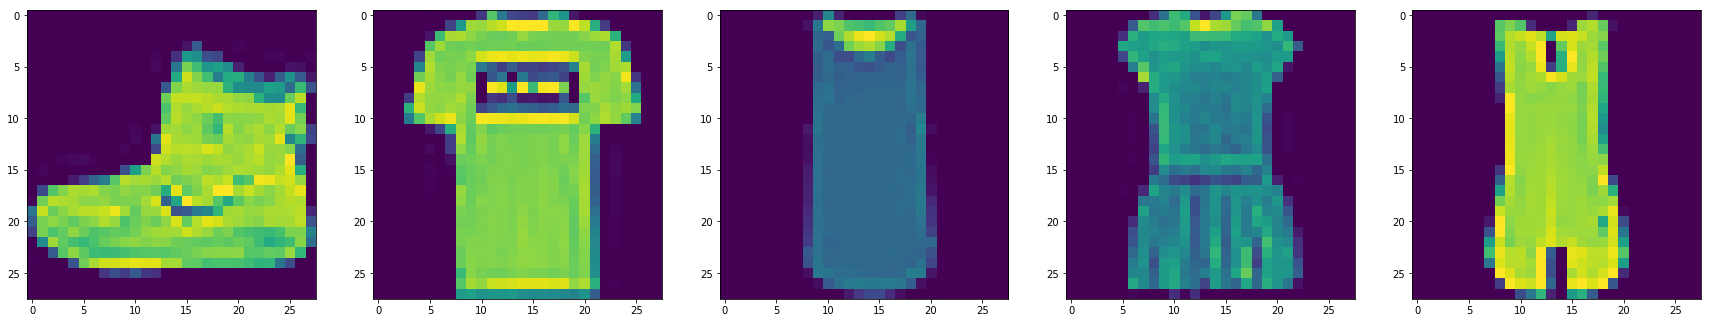

In [10]:
f, ax = plt.subplots(1, 5, figsize=(30, 30))
for i in range(5):
    ax[i].imshow(X_train[i].reshape(28, 28))

## Building CNN model

In [11]:
model = Sequential([
    ZeroPadding2D((1,1)),
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    ZeroPadding2D((1,1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    ZeroPadding2D((1,1)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

### Compiling the model

In [12]:
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.fit(X_train, y_train, validation_split = 0.1,
          batch_size=240, epochs = 50, verbose=1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 217s 4ms/step - loss: 3.6393 - acc: 0.5506 - val_loss: 0.5188 - val_acc: 0.8177
Epoch 2/50
54000/54000 [==============================] - 206s 4ms/step - loss: 0.6136 - acc: 0.7764 - val_loss: 0.3886 - val_acc: 0.8467
Epoch 3/50
54000/54000 [==============================] - 207s 4ms/step - loss: 0.5062 - acc: 0.8158 - val_loss: 0.3412 - val_acc: 0.8738
Epoch 4/50
54000/54000 [==============================] - 213s 4ms/step - loss: 0.4499 - acc: 0.8383 - val_loss: 0.3201 - val_acc: 0.8780
Epoch 5/50
54000/54000 [==============================] - 217s 4ms/step - loss: 0.4162 - acc: 0.8490 - val_loss: 0.3035 - val_acc: 0.8838
Epoch 6/50
54000/54000 [==============================] - 222s 4ms/step - loss: 0.3898 - acc: 0.85

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

## Evaluating the model

In [15]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Loss :', score[0])
print('Accuracy :' + str(score[1] * 100) + '%')

10000/10000 [==============================] - 30s 3ms/step
Loss : 0.2249596336722374
Accuracy :92.22%
